In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from datetime import datetime

In [86]:
def plot_chicago(counts):
    #expects geopandas dataframe with chicago boundary information
    #and counts as a pandas dataframe
    chicago=gp.read_file('/media/benjamin/Data/Chicago_Transit/Shapes/geo_export_43aec312-120e-4284-b1ca-b89761679d63.shp')
    chicago['pickup community area']=chicago['area_num_1'].astype(np.int32)
    with_count=chicago.merge(counts,on='pickup community area',how='left')
    fix, ax = plt.subplots(1,1) 
    with_count.plot(column='count',ax=ax,legend=True,legend_kwds={'label':'Pickup Count'})
    return with_count

def predict(time):
    index=np.ndarray(77)
    area_counts=np.ndarray(77)
    d={'time':datetime.strptime(time,"%Y-%m-%d-%H")}
    julday=pd.DataFrame(data=d,index=[0]).set_index('time').index.to_julian_date()[0]
    coeffs=np.load('NbdModels.npy')
    for i in np.arange(0,77):
        int_i=int(i)
        index[int_i]=int_i+1
        area_counts[int_i]=coeffs[0,int_i]*np.sin(2.*3.14159*julday*2.)+coeffs[1,int_i]*np.cos(2.*3.14159*julday*2.)+coeffs[2,int_i]*np.sin(2.*3.14159*julday)+coeffs[3,int_i]*np.cos(2.*3.14159*julday)+coeffs[4,int_i]*np.sin(2.*3.14159*julday/7.)+coeffs[5,int_i]*np.cos(2.*3.14159*julday/7)+coeffs[6,int_i]
   
    counts=pd.DataFrame(data=np.column_stack([index,area_counts]),columns=['pickup community area','count'])
    #return counts    
    merged=plot_chicago(counts)
    merged=merged.sort_values(['count'],ascending=False).head()
    merged=merged[['community','count']]
    return merged

In [87]:
#Please enter a date below in the format 'YYYY-MO-DY-HR', then run the cell.
time = ....

SyntaxError: invalid syntax (3148740501.py, line 2)

In [91]:
time='2021-02-13-17'

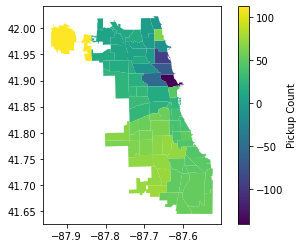

In [92]:
merged=predict(time)
merged.head(5)

In [90]:
merged.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,pickup community area,count
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",74,72.811777
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",75,70.693135
70,0.0,72,72,0.0,0.0,BEVERLY,0.0,8.877936e+07,44591.485101,"POLYGON ((-87.67308 41.73566, -87.66975 41.731...",72,69.154838
71,0.0,73,73,0.0,0.0,WASHINGTON HEIGHTS,0.0,7.963575e+07,42222.598163,"POLYGON ((-87.63373 41.72885, -87.63369 41.726...",73,65.863788
68,0.0,70,70,0.0,0.0,ASHBURN,0.0,1.354603e+08,54818.154632,"POLYGON ((-87.71255 41.75734, -87.71252 41.757...",70,62.650205


In [94]:
merged[['community','count']]

,community,count
74,OHARE,112.991752
73,MORGAN PARK,76.243407
71,WASHINGTON HEIGHTS,74.234654
72,MOUNT GREENWOOD,73.014039
66,GREATER GRAND CROSSING,72.249487
